In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=';')
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
x = data[['alcohol']].values
y = data['quality'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 0)

In [4]:
#fit the data into regression model
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [5]:
#fit a polynomial regression model to the data
#polynomial line gives better fit than linear line
poly = PolynomialFeatures(degree = 2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_train)

LinearRegression()

In [6]:
print(x_train.shape)
print(x_poly_train.shape)

(3918, 1)
(3918, 3)


In [7]:
y_pred_lin = LR.predict(x_test)
y_pred_poly = poly_reg.predict(x_poly_test)

In [8]:
#printing the performance of regression and polynomial models 

print("Linear Regression Metrics : ")
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Mean Squared Error : ", mse_lin)
print("Root Mean Squared Error : ", rmse_lin)
print("R2 Score : ", r2_lin)

Linear Regression Metrics : 
Mean Squared Error :  0.730644234019256
Root Mean Squared Error :  0.8547773008329457
R2 Score :  0.1710201454832173


In [9]:
print("Polynomial Regression Metrics : ")
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Mean Squared Error : ", mse_poly)
print("Root Mean Squared Error : ", rmse_poly)
print("R2 Score : ", r2_poly)

Polynomial Regression Metrics : 
Mean Squared Error :  0.7321933575255221
Root Mean Squared Error :  0.8556829772325274
R2 Score :  0.16926252923298202


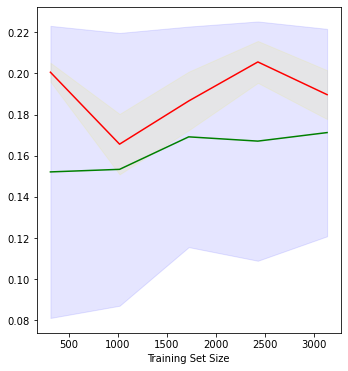

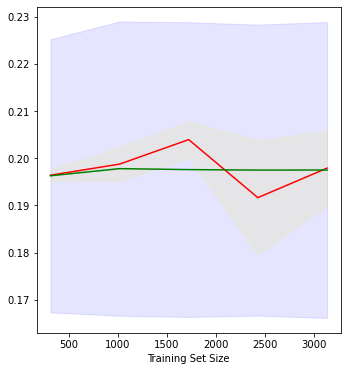

In [10]:
#ploting the learning curvees

train_sizes, train_scores_lin, test_scores_lin = learning_curve(LR, x, y, cv = 5)
train_sizes, train_scores_poly, test_scores_poly = learning_curve(poly_reg, x_poly_train, y_train, cv = 5)

train_mean_lin = np.mean(train_scores_lin, axis = 1)
train_std_lin = np.std(train_scores_lin, axis = 1)

test_mean_lin = np.mean(test_scores_lin, axis = 1)
test_std_lin = np.std(test_scores_lin, axis = 1)

train_mean_poly = np.mean(train_scores_poly, axis = 1)
train_std_poly = np.std(train_scores_poly, axis = 1)

test_mean_poly = np.mean(test_scores_poly, axis = 1)
test_std_poly = np.std(test_scores_poly, axis = 1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(train_sizes, train_mean_lin, label = 'Training Score', color= 'Red')
plt.plot(train_sizes, test_mean_lin, label = 'Cross-Validation Score', color= 'Green')
plt.fill_between(train_sizes, train_mean_lin - train_std_lin, train_mean_lin + train_std_lin, alpha = 0.1, color= 'yellow')
plt.fill_between(train_sizes, test_mean_lin - test_std_lin, test_mean_lin + test_std_lin, alpha = 0.1, color = 'Blue')
plt.xlabel('Training Set Size')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.plot(train_sizes, train_mean_poly, label = 'Training Score', color= 'Red')
plt.plot(train_sizes, test_mean_poly, label = 'Cross-Validation Score', color= 'Green')
plt.fill_between(train_sizes, train_mean_poly - train_std_poly, train_mean_poly + train_std_poly, alpha = 0.1, color= 'yellow')
plt.fill_between(train_sizes, test_mean_poly - test_std_poly, test_mean_poly + test_std_poly, alpha = 0.1, color = 'Blue')
plt.xlabel('Training Set Size')
plt.show()

